In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
data= pd.read_csv('gas_turbines.csv')

In [10]:
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [11]:
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [12]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [21]:
data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

<AxesSubplot:>

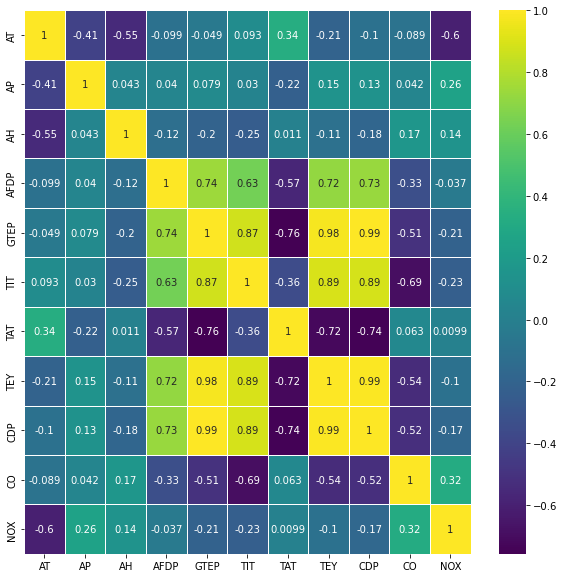

In [24]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(),annot=True,cmap='viridis',linewidths=.5)

In [26]:
data.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

(array([1.000e+00, 2.900e+01, 1.071e+03, 5.096e+03, 5.044e+03, 2.673e+03,
        7.350e+02, 1.890e+02, 1.140e+02, 8.700e+01]),
 array([ 27.765 ,  36.9775,  46.19  ,  55.4025,  64.615 ,  73.8275,
         83.04  ,  92.2525, 101.465 , 110.6775, 119.89  ]),
 <BarContainer object of 10 artists>)

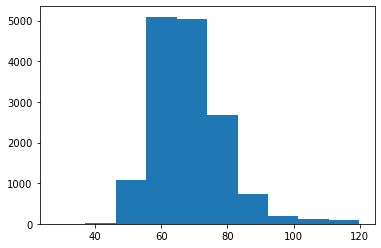

In [28]:
plt.hist(data.NOX)

In [31]:
duplicate = data.duplicated()
print(duplicate.sum())
data[duplicate]

0


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


AT


C:\Users\vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


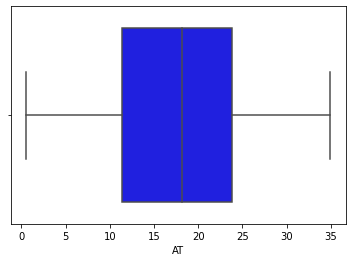

AP


C:\Users\vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


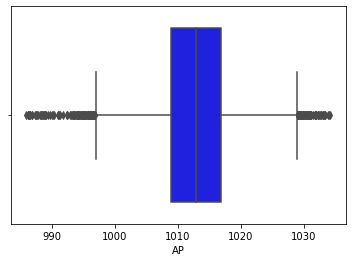

AH


C:\Users\vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


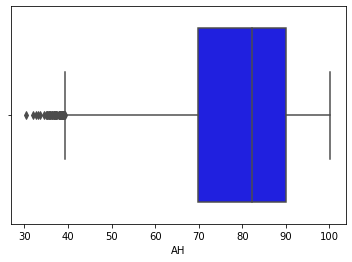

AFDP


C:\Users\vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


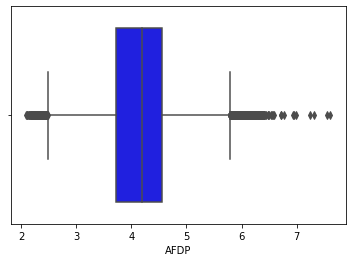

C:\Users\vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


GTEP


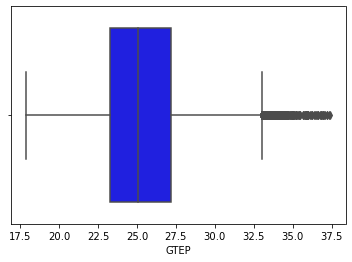

C:\Users\vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TIT


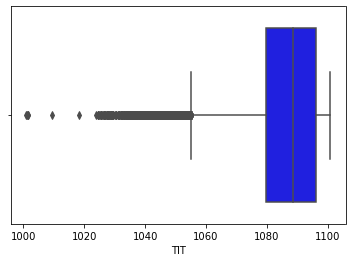

C:\Users\vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TAT


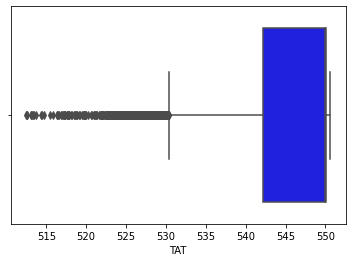

C:\Users\vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TEY


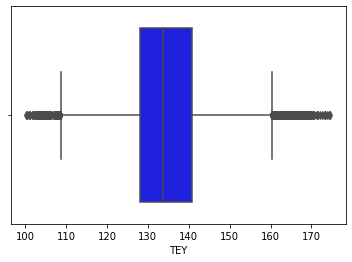

CDP


C:\Users\vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


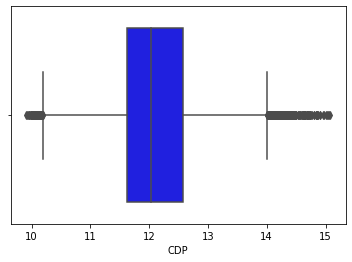

C:\Users\vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


CO


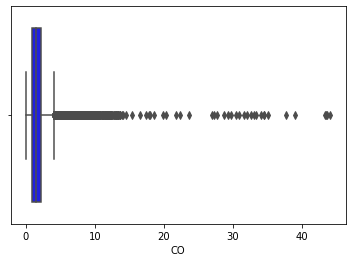

C:\Users\vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NOX


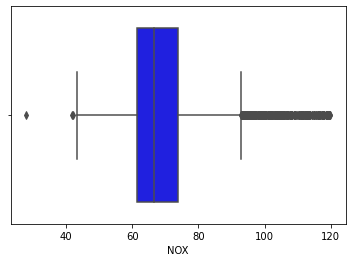

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

for i in data.columns:
    print(i)
    sns.boxplot(data[i],color = 'blue')
    plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x204aa296b20>,
 'caps': [<matplotlib.lines.Line2D at 0x204aa2a4280>,
 'boxes': [<matplotlib.lines.Line2D at 0x204aa296760>],
 'medians': [<matplotlib.lines.Line2D at 0x204aa2a49a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x204aa2a4d30>],
 'means': []}

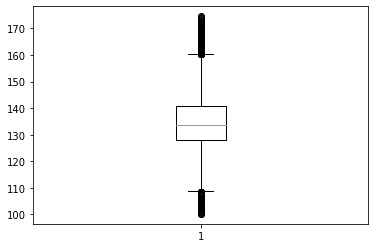

In [34]:
plt.boxplot(data['TEY'])

C:\Users\vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TEY'>

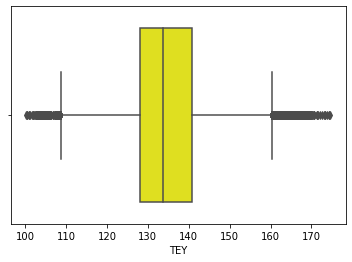

In [56]:
sns.boxplot(data['TEY'], color = 'yellow')

In [36]:
#Independent and Dependent variable

In [37]:
X = data.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]
y= data.loc[:,['TEY']]

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [39]:
def baseline_model():
    model = Sequential()
    model.add(Dense(10, input_dim=10, activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [40]:
import keras
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import InputLayer,Dense
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

C:\Users\vinay\AppData\Local\Temp/ipykernel_18216/1991303876.py:6: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)


Results: -0.24 (0.18) MSE


In [41]:
estimator.fit(X, y)
prediction = estimator.predict(X)
prediction

array([-0.9780989 , -0.98675126, -0.9850928 , ..., -1.1014395 ,
       -1.2490721 , -1.2597656 ], dtype=float32)

In [42]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [43]:
estimator.fit(X_train, y_train)
prediction = estimator.predict(X_test)

In [44]:
prediction

array([-1.2238964 , -1.3674808 ,  0.8798415 , ...,  0.02582867,
       -0.06423031,  0.8460373 ], dtype=float32)

In [45]:
X = data.drop(columns = ['TEY'], axis = 1) 
y = data.iloc[:,7]

In [46]:
from sklearn.preprocessing import scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
X_test_scaled

array([[ 0.82623246, -0.43954308, -0.25924569, ...,  0.10039242,
        -0.3796304 , -0.69217007],
       [ 0.35282087,  0.23279782,  0.80230139, ..., -1.18541222,
         0.39149515, -1.09475442],
       [ 0.32839008, -0.07135639,  0.25312287, ...,  0.01665304,
        -0.00296896, -0.31891741],
       ...,
       [-0.74071701,  0.37687087,  0.43427425, ...,  1.77157829,
        -1.00127821, -0.4818816 ],
       [-0.49965786, -0.39151873,  0.64680105, ..., -0.26517949,
        -0.48137538,  0.12808615],
       [ 0.13151427,  0.32884652,  0.98830762, ..., -1.40331469,
         0.13152215, -0.64456466]])

In [47]:
import tensorflow as tf
input_size = len(X.columns)
output_size = 1
hidden_layer_size = 50

model = tf.keras.Sequential([
                                
                               tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),     
                               tf.keras.layers.Dense(output_size)
                             ])

In [48]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.03)
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MeanSquaredError'])

In [50]:
num_epochs = 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)
model.fit(X_train_scaled, y_train, callbacks = early_stopping, validation_split = 0.1, epochs = num_epochs, verbose = 2)

Epoch 1/100
381/381 - 1s - loss: 3157.0857 - mean_squared_error: 3157.0857 - val_loss: 212.3976 - val_mean_squared_error: 212.3976 - 1s/epoch - 3ms/step
Epoch 2/100
381/381 - 1s - loss: 108.6671 - mean_squared_error: 108.6671 - val_loss: 80.2606 - val_mean_squared_error: 80.2606 - 665ms/epoch - 2ms/step
Epoch 3/100
381/381 - 1s - loss: 47.8409 - mean_squared_error: 47.8409 - val_loss: 38.6873 - val_mean_squared_error: 38.6873 - 716ms/epoch - 2ms/step
Epoch 4/100
381/381 - 1s - loss: 22.1806 - mean_squared_error: 22.1806 - val_loss: 16.0454 - val_mean_squared_error: 16.0454 - 804ms/epoch - 2ms/step
Epoch 5/100
381/381 - 1s - loss: 10.7149 - mean_squared_error: 10.7149 - val_loss: 7.7717 - val_mean_squared_error: 7.7717 - 738ms/epoch - 2ms/step
Epoch 6/100
381/381 - 1s - loss: 5.6341 - mean_squared_error: 5.6341 - val_loss: 4.0119 - val_mean_squared_error: 4.0119 - 696ms/epoch - 2ms/step
Epoch 7/100
381/381 - 1s - loss: 3.2068 - mean_squared_error: 3.2068 - val_loss: 2.8235 - val_mean_sq

In [51]:
test_loss, mean_squared_error = model.evaluate(X_test_scaled, y_test)

47/47 [==============================] - 0s 2ms/step - loss: 1.0571 - mean_squared_error: 1.0571


In [52]:
predictions = model.predict_on_batch(X_test_scaled)

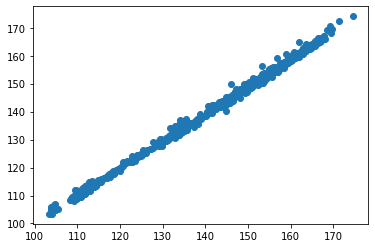

In [53]:
plt.scatter(y_test, predictions)

In [54]:
predictions_df = pd.DataFrame()
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = predictions
predictions_df['% Error'] = abs(predictions_df['Actual'] - predictions_df['Predicted'])/predictions_df['Actual']*100
predictions_df.reset_index(drop = True)

,Actual,Predicted,% Error
0,134.46,133.842575,0.459189
1,111.88,112.082710,0.181185
2,133.72,134.001404,0.210443
3,133.79,133.013657,0.580270
4,110.77,110.585320,0.166724
...,...,...,...
1499,132.85,132.351120,0.375521
1500,125.07,124.541428,0.422621
1501,160.95,159.741608,0.750787
1502,133.12,132.689407,0.323462
